# EDA for Spotify and Youtube Data

In [1]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore
import warnings
warnings.filterwarnings('ignore')

## Descriptive Analysis

In [2]:
df = pd.read_csv("D:/Kodlasam/Bitirme Projesi/asset-v1_Kodlasam+VAM-19+2023-09-20+type@asset+block@Capstone/Capstone/Capstone Project EDA DataSet/Spotify and Youtube/Spotify_Youtube.csv")
df.head()

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20718 non-null  int64  
 1   Artist            20718 non-null  object 
 2   Url_spotify       20718 non-null  object 
 3   Track             20718 non-null  object 
 4   Album             20718 non-null  object 
 5   Album_type        20718 non-null  object 
 6   Uri               20718 non-null  object 
 7   Danceability      20716 non-null  float64
 8   Energy            20716 non-null  float64
 9   Key               20716 non-null  float64
 10  Loudness          20716 non-null  float64
 11  Speechiness       20716 non-null  float64
 12  Acousticness      20716 non-null  float64
 13  Instrumentalness  20716 non-null  float64
 14  Liveness          20716 non-null  float64
 15  Valence           20716 non-null  float64
 16  Tempo             20716 non-null  float6

In [4]:
df.nunique()

Unnamed: 0          20718
Artist               2079
Url_spotify          2079
Track               17841
Album               11937
Album_type              3
Uri                 18862
Danceability          898
Energy               1268
Key                    12
Loudness             9417
Speechiness          1303
Acousticness         3138
Instrumentalness     4012
Liveness             1536
Valence              1293
Tempo               15024
Duration_ms         14690
Url_youtube         18154
Title               18146
Channel              6714
Views               19245
Likes               17939
Comments            10485
Description         17395
Licensed                2
official_video          2
Stream              18461
dtype: int64

## Data Cleaning
- Dropping URL columns and index column
- Filling NA in Likes with 0
- Filling NA in Comments with 0
- Filling NA in Title with Artist - Track
- Dropping duplicates in Title
- Dropping other NA values

In [5]:
url_cols = ['Unnamed: 0', 'Url_spotify', 'Uri', 'Url_youtube']
df.drop(url_cols, axis=1, inplace=True)

In [6]:
df.isna().sum()

Artist                0
Track                 0
Album                 0
Album_type            0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Title               470
Channel             470
Views               470
Likes               541
Comments            569
Description         876
Licensed            470
official_video      470
Stream              576
dtype: int64

In [7]:
df['Likes'] = df['Likes'].fillna(0)
df['Comments'] = df['Comments'].fillna(0)
df['Title'] = df.apply(lambda row: f"{row['Artist']} - {row['Track']}" if pd.isna(row['Title']) else row['Title'], axis=1)
df.dropna(inplace=True)

In [8]:
df.describe()

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
count,19298.000000,19298.000000,19298.000000,19298.000000,19298.000000,19298.000000,19298.000000,19298.000000,19298.000000,19298.000000,1.929800e+04,1.929800e+04,1.929800e+04,1.929800e+04,1.929800e+04
mean,0.621054,0.635808,5.292103,-7.622436,0.094717,0.288219,0.055655,0.191213,0.528307,120.580877,2.247218e+05,9.683675e+07,6.799624e+05,2.822475e+04,1.381404e+08
std,0.165511,0.213567,3.579583,4.618275,0.104731,0.285900,0.193055,0.165146,0.245251,29.572995,1.275723e+05,2.791808e+08,1.815996e+06,1.971631e+05,2.474362e+08
min,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,2.600000e+01,0.000000e+00,0.000000e+00,6.574000e+03
25%,0.520000,0.510000,2.000000,-8.756000,0.035700,0.043600,0.000000,0.094025,0.338000,96.997500,1.802432e+05,2.066310e+06,2.395475e+04,5.580000e+02,1.784301e+07
50%,0.639000,0.667000,5.000000,-6.506000,0.050500,0.188000,0.000002,0.125000,0.535000,119.965000,2.133575e+05,1.558484e+07,1.317370e+05,3.456500e+03,5.026902e+07
75%,0.742000,0.797000,8.000000,-4.922000,0.103750,0.469000,0.000442,0.234000,0.724750,139.940500,2.519268e+05,7.340811e+07,5.394230e+05,1.478250e+04,1.407806e+08
max,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09


In [9]:
df.isna().sum()

Artist              0
Track               0
Album               0
Album_type          0
Danceability        0
Energy              0
Key                 0
Loudness            0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Duration_ms         0
Title               0
Channel             0
Views               0
Likes               0
Comments            0
Description         0
Licensed            0
official_video      0
Stream              0
dtype: int64

In [10]:
duplicate_counts = df['Title'].value_counts()
duplicates_only = duplicate_counts[duplicate_counts > 1]
print(duplicates_only)

Title
Color Esperanza 2020 - Various Artists (Official Video)                                      18
Varios Artistas Latinos - EL Ultimo Adios                                                    13
MACKLEMORE & RYAN LEWIS - CAN'T HOLD US FEAT. RAY DALTON (OFFICIAL MUSIC VIDEO)              12
Kool & The Gang - Cherish                                                                    10
Joan Jett & the Blackhearts - I Hate Myself for Loving You (Official Video)                  10
                                                                                             ..
Colicky Baby Sleeps To This Magic Sound | White Noise 10 Hours | Soothe crying infant         2
Olivia Rodrigo - All I Want (Official Video)                                                  2
Gorillaz - New Gold ft. Tame Impala & Bootie Brown (Official Visualiser)                      2
Gorillaz - New Gold ft. Tame Impala, Bootie Brown (Dom Dolla Remix) (Official Live Video)     2
Gorillaz - Cracker Island ft. Thun

In [11]:
df.drop_duplicates(subset='Title', inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17296 entries, 0 to 20717
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            17296 non-null  object 
 1   Track             17296 non-null  object 
 2   Album             17296 non-null  object 
 3   Album_type        17296 non-null  object 
 4   Danceability      17296 non-null  float64
 5   Energy            17296 non-null  float64
 6   Key               17296 non-null  float64
 7   Loudness          17296 non-null  float64
 8   Speechiness       17296 non-null  float64
 9   Acousticness      17296 non-null  float64
 10  Instrumentalness  17296 non-null  float64
 11  Liveness          17296 non-null  float64
 12  Valence           17296 non-null  float64
 13  Tempo             17296 non-null  float64
 14  Duration_ms       17296 non-null  float64
 15  Title             17296 non-null  object 
 16  Channel           17296 non-null  object 
 17

## Data Visualisation

Here, I performed data visualization tasks using Python to analyze and present insights from the dataset. I created various plots, including bar charts, scatter plots, and pie charts, to compare key metrics such as views, likes, and comments.

### Basic Overview & Correlations

The correlation heatmap below visualizes the pairwise relationships between various audio features of songs, such as danceability, energy, and tempo. By showing the correlation coefficients between each pair of features, the heatmap helps identify patterns like how closely related features are, such as tempo and energy, or danceability and valence.

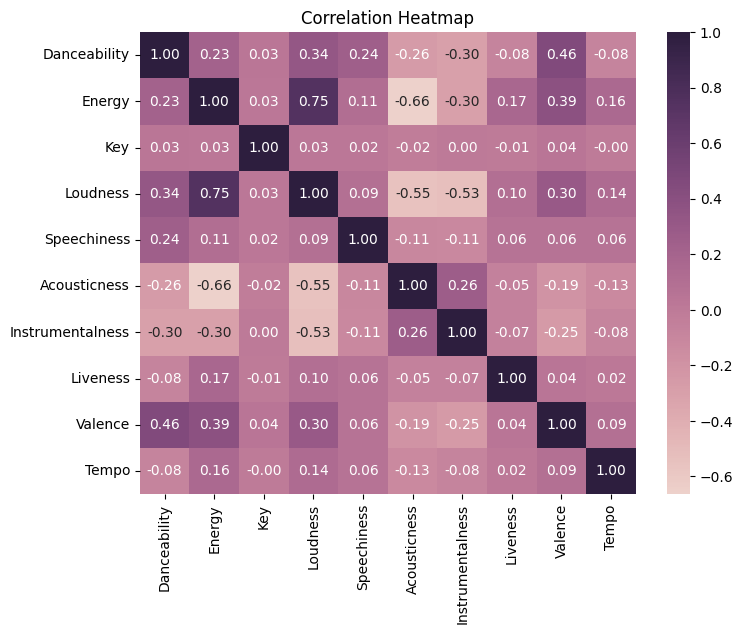

In [13]:
# Correlation heatmap
corr = df[['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap=sns.cubehelix_palette(as_cmap=True), fmt='.2f', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

We can observe a strong positive correlation between energy and loudness, suggesting that high-energy songs tend to have higher loudness levels. Additionally, there is a negative correlation between acousticness and danceability, indicating that acoustic songs are generally less danceable.

# =====================================================

There are two scatter plots side by side below. The first plot shows the relationship between Views and Likes, while the second plot displays the correlation between Views and Comments. Both plots are set with shared axes to ensure a uniform scale, making it easier to compare trends across the two visualizations.

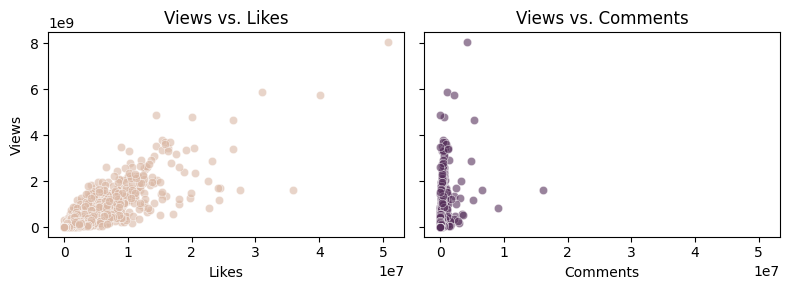

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3), sharex=True, sharey=True)

# Scatter plot for Views vs Likes
sns.scatterplot(ax=axes[0], x='Likes', y='Views', data=df, alpha=0.6, color='#dab8a5')
axes[0].set_title('Views vs. Likes')
axes[0].set_xlabel('Likes')
axes[0].set_ylabel('Views')

# Scatter plot for Views vs Comments
sns.scatterplot(ax=axes[1], x='Comments', y='Views', data=df, alpha=0.6, color='#56305b')
axes[1].set_title('Views vs. Comments')
axes[1].set_xlabel('Comments')
axes[1].set_ylabel('Views')

plt.tight_layout()
plt.show()


The number of likes seems to be a stronger indicator of views compared to the number of comments. The weak correlation between comments and views suggests that comments might depend on other factors, such as the type of content or engagement style.

### Top Songs/Artists

The bar chart below displays the top 20 artists based on their total streams. By aggregating the stream counts for each artist, we can easily identify which artists have the most influence and popularity within the dataset.

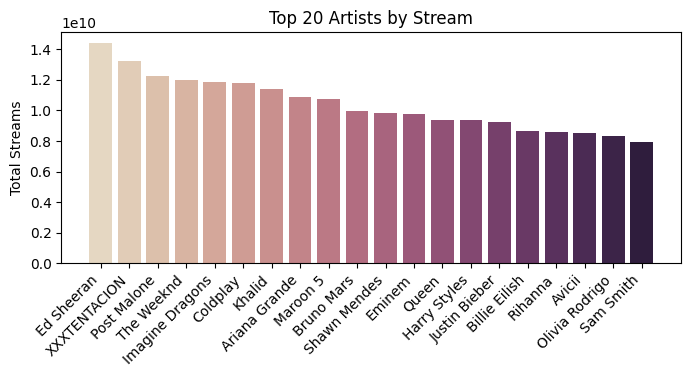

In [15]:
# Top artists by stream
top_artists = df.groupby('Artist')['Stream'].sum().sort_values(ascending=False).head(20)
top_artists = top_artists.reset_index()

# Define the cubehelix colors
cubehelix_colors = ['#e5d7c2', '#e1ccb7', '#dcc0ab', '#d8b4a2', '#d4a79a', '#cf9c94', '#c9908e', '#c28489', '#bb7985', '#b26d81', '#a8647e', '#9c597a', '#915176', '#834871', '#76406b', '#693965', '#59315d', '#4b2b54', '#3c2448', '#2f1d3d']

plt.figure(figsize=(8, 3))
plt.bar(top_artists['Artist'], top_artists['Stream'], color=cubehelix_colors)

plt.title('Top 20 Artists by Stream')
plt.ylabel('Total Streams')
plt.xticks(rotation=45, ha='right')
plt.show()

The distribution highlights Ed Sheeran's dominance in total streams compared to the rest of the artists. The list includes a mix of genres and eras, suggesting the broad diversity of popular music.

# =====================================================

This bar plot displays the top 10 artists based on their total streams on Spotify and views on YouTube. The stacked bars allow for easy comparison of how each artist performs on both platforms.

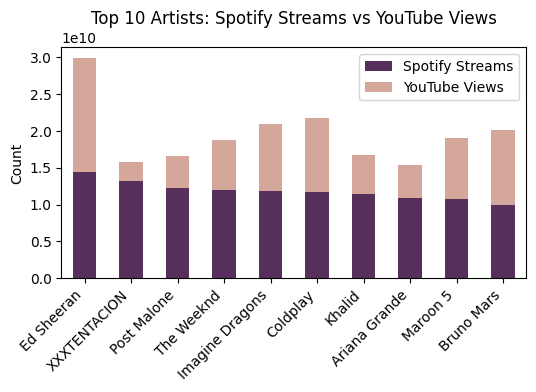

In [16]:
# Top artists by Streams and Views
top_artists_data = df.groupby('Artist')[['Stream', 'Views']].sum().sort_values('Stream', ascending=False).head(10)

top_artists_data.plot(kind='bar', stacked=True, figsize=(6, 3), color=['#56305b', '#d4a79a'])
plt.title('Top 10 Artists: Spotify Streams vs YouTube Views')
plt.ylabel('Count')
plt.xlabel('')
plt.legend(['Spotify Streams', 'YouTube Views'])
plt.xticks(rotation=45, ha='right')
plt.show()

The chart shows clear dominance of Spotify for Ed Sheeran compared to other artists. For many artists, both platforms play a key role, but there are variations in platform preference depending on the artist. This data can help analyze cross-platform engagement and guide strategies for targeting audiences on different platforms.

# =====================================================

This set of bar plots visualizes the top 10 songs based on different engagement metrics: views, likes, and comments. Each plot represents one of the metrics, with songs ranked accordingly. This layout offers a clear comparison of how songs perform across these three popular engagement indicators.

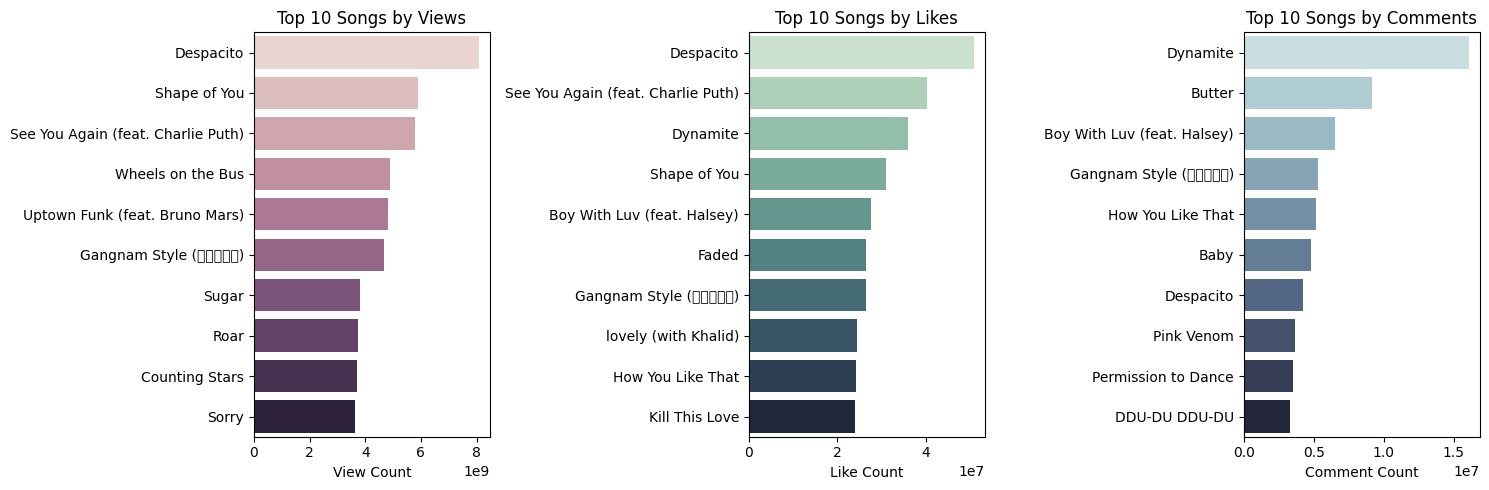

In [17]:
top_views = df.nlargest(10, 'Views')
top_likes = df.nlargest(10, 'Likes')
top_comments = df.nlargest(10, 'Comments')

plt.figure(figsize=(15, 5))

palette = sns.cubehelix_palette(n_colors=10)

# Top 10 by Views
plt.subplot(1, 3, 1)
sns.barplot(y=top_views['Track'], x=top_views['Views'], palette=palette)
plt.title('Top 10 Songs by Views')
plt.xlabel('View Count')
plt.ylabel('')

palette = sns.cubehelix_palette(rot=-.4, n_colors=10)

# Top 10 by Likes
plt.subplot(1, 3, 2)
sns.barplot(y=top_likes['Track'], x=top_likes['Likes'], palette=palette)
plt.title('Top 10 Songs by Likes')
plt.xlabel('Like Count')
plt.ylabel('')

palette = sns.cubehelix_palette(rot=-.2, n_colors=10)

# Top 10 by Comments
plt.subplot(1, 3, 3)
sns.barplot(y=top_comments['Track'], x=top_comments['Comments'], palette=palette)
plt.title('Top 10 Songs by Comments')
plt.xlabel('Comment Count')
plt.ylabel('')

plt.tight_layout()
plt.show()

Despacito appears in the top 10 for both views and likes, indicating its massive popularity. Songs like "Shape of You" and "See You Again" appear high on the views list, highlighting the enduring popularity of classic hits. "Gangnam Style" and "Wheels on the Bus" likely benefited from viral trends and meme culture, leading to high view counts. Songs with strong fan bases, like BTS songs, tend to have high like counts.

### Album & Channel Analysis

This pie chart visualizes the distribution of total views and streams across different album types, providing insights into how views and streams are spread among various categories of albums in the dataset.

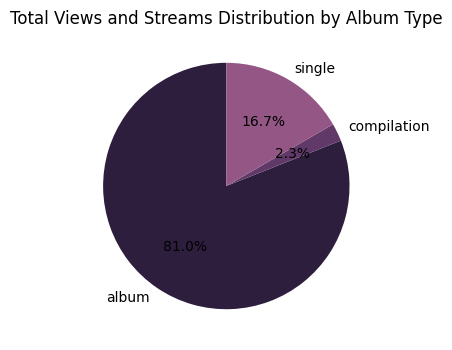

In [18]:
views_and_streams_by_album_type = df.groupby('Album_type')[['Views', 'Stream']].sum()
combined = views_and_streams_by_album_type.sum(axis=1)

# Pie chart
plt.figure(figsize=(4, 4))
plt.pie(combined, labels=combined.index, autopct='%1.1f%%', colors=sns.cubehelix_palette(reverse=True), startangle=90)
plt.title('Total Views and Streams Distribution by Album Type')
plt.show()

This bar plot visualizes the average streams on Spotify and views on YouTube by album type, highlighting the differences in engagement across various album categories. The chart compares the mean values of streams and views.

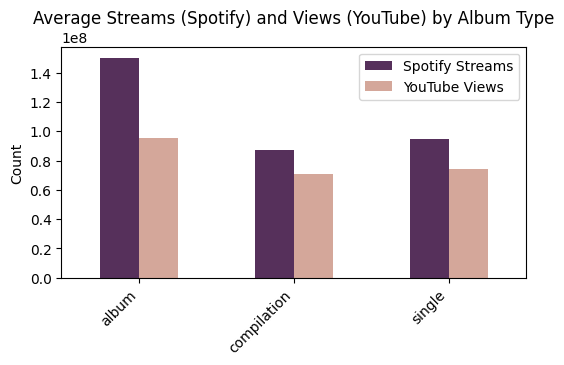

In [19]:
# Average Streams and Views per Album Type
avg_data = df.groupby('Album_type')[['Stream', 'Views']].mean()

avg_data.plot(kind='bar', figsize=(6, 3), color=['#56305b', '#d4a79a'])
plt.title('Average Streams (Spotify) and Views (YouTube) by Album Type')
plt.ylabel('Count')
plt.xlabel('')
plt.legend(['Spotify Streams', 'YouTube Views'])
plt.xticks(rotation=45, ha='right')
plt.show()


This bar plot visualizes the top 10 Youtube channels by total views, with the channels sorted in descending order. It highlights which channels have the highest engagement in terms of views, providing a clear and straightforward comparison.

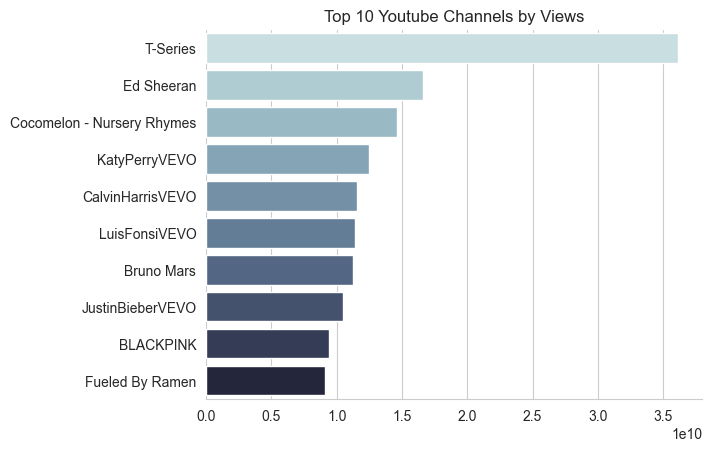

In [20]:
df_channels = df.groupby("Channel")["Views"].sum().reset_index()
df_sort_channels = df_channels.sort_values("Views", ascending=False).head(10)

palette = sns.cubehelix_palette(rot=-.2, n_colors=10)

sns.set_style("whitegrid")
sns.barplot(x="Views", y="Channel", data=df_sort_channels, palette=palette)
sns.despine(left=True)
plt.title('Top 10 Youtube Channels by Views')
plt.xlabel('')
plt.ylabel('')
plt.show()

### Licensing Insights

This bar plot compares the average views for licensed versus non-licensed tracks. By grouping the data based on licensing status, the chart reveals the difference in average views between these two categories, providing insight into whether licensed tracks attract more views than non-licensed ones.

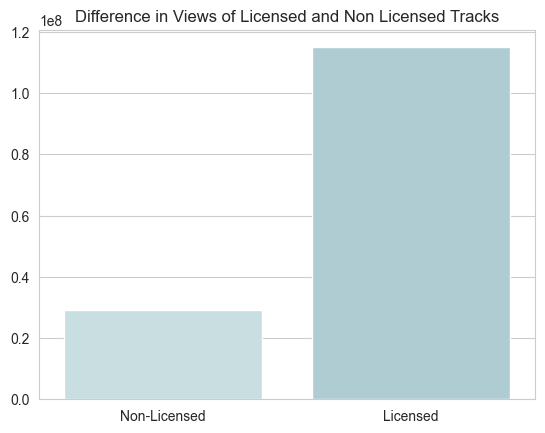

In [21]:
licensed_views=df.groupby(['Licensed'])['Views'].mean()
licensed_views=licensed_views.to_list()

plt.title("Difference in Views of Licensed and Non Licensed Tracks")
sns.barplot(x=['Non-Licensed','Licensed'], y=licensed_views, palette=palette)
plt.show()